# Iris Dataset 

Iris dataset is a typical machine learning classification problem. There are three species of Iris flower. When a new flower is given, we need to predict it belongs to which type. Following figure shows the samples of all three species  


<img src="Iris_type.jpg" width="100%">

How to extract features from these flowers is a critical step. But, we don't have to do it by image processing. Some numeric measurements are given in ** Iris Datasets **

<img src="Iris_measure.png" width="100%">

In [60]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

In [107]:
iris = pd.read_csv("IRIS.csv")
iris.sample(10)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
26,27,5.0,3.4,1.6,0.4,setosa
5,6,5.4,3.9,1.7,0.4,setosa
54,55,6.5,2.8,4.6,1.5,versicolor
74,75,6.4,2.9,4.3,1.3,versicolor
105,106,7.6,3.0,6.6,2.1,virginica
137,138,6.4,3.1,5.5,1.8,virginica
107,108,7.3,2.9,6.3,1.8,virginica
104,105,6.5,3.0,5.8,2.2,virginica
40,41,5.0,3.5,1.3,0.3,setosa
12,13,4.8,3.0,1.4,0.1,setosa


In [62]:
iris.shape

(150, 6)

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [64]:
iris.isnull().sum()

ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [65]:
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### Scatter Plot 

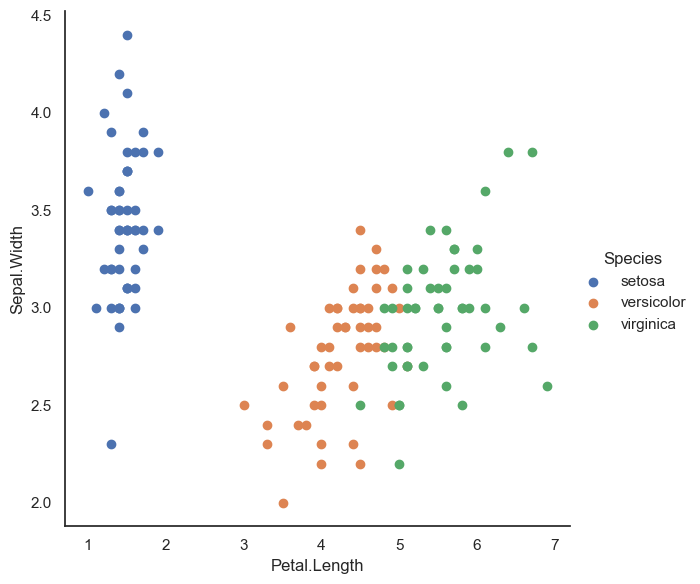

In [66]:
sns.FacetGrid(iris, hue="Species",height=6).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()
plt.show()

# Heat Map 

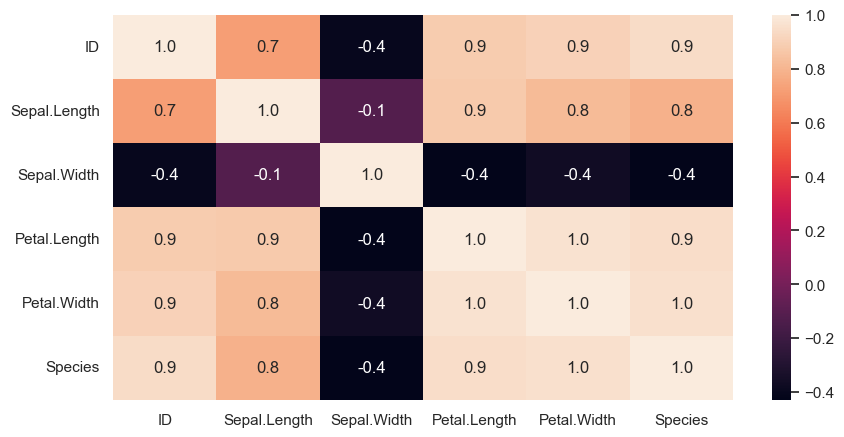

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(),annot=True,fmt='0.1f')
plt.show()

# Logistic Regression

#### Converting categorical varibales into numbers

In [67]:
iris["Species"] = iris["Species"].map({'setosa': 0,'versicolor': 1,'virginica':2})

In [68]:
iris.sample(5)

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
22,23,4.6,3.6,1.0,0.2,0
47,48,4.6,3.2,1.4,0.2,0
98,99,5.1,2.5,3.0,1.1,1
81,82,5.5,2.4,3.7,1.0,1
147,148,6.5,3.0,5.2,2.0,2


### Preparing inputs and outputs 

In [69]:
X=iris.drop(['ID','Species'],axis=1)
y=iris['Species']

# Logistic Regression 

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state= 23)

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [72]:
model.fit(X_train, y_train)

LogisticRegression()

### Make Predictions

In [76]:
predicted = model.predict(X_test)

#### Accuracy 

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy: ", accuracy_score(predicted,y_test))

Accuracy:  1.0


#### summarize the fit of the model

In [81]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [83]:
print(metrics.confusion_matrix(y_test, predicted))

[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


In [94]:
import joblib

In [95]:
joblib.dump(model,'iris_classification_prediction')

['iris_classification_prediction']

In [101]:
Model1= joblib.load('iris_classification_prediction')

# Prediction on New Data

In [97]:
new_data = pd.DataFrame({
    'Sepal.Length':4.6,
    'Sepal.Width':3.2,
    'Petal.Length':1.5,
    'Petal.Width':0.2,
     
},index=[0])


In [98]:
new_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,4.6,3.2,1.5,0.2


In [102]:
p = Model1.predict(new_data)

In [103]:
if p[0]== 0:
    print("setosa")
elif p[0] == 1:
    print("versicolor")
else:
    print("virginica")

setosa


In [105]:
from tkinter import *

In [109]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    Model1= joblib.load('iris_classification_prediction')
    df = pd.DataFrame({
    'Sepal.Length':p1,
    'Sepal.Width':p2,
    'Petal.Length':p3,
    'Petal.Width':p4,
     
},index=[0])
    result = Model1.predict(df)
    if result[0]== 0:
        Label(master, text="Classifiction is setosa").grid(row=12)
    elif result[0] == 1:
        Label(master, text="Classifiction is versicolor").grid(row=12)
    else:
        Label(master, text="Classifiction is virginica").grid(row=12)
        
        
master = Tk()
master.title("Iris Classification Prediction Using Machine Learning")


label = Label(master, text = "Iris Classification Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Sepal.Length").grid(row=1)
Label(master, text="Sepal.Width").grid(row=2)
Label(master, text="Petal.Length").grid(row=3)
Label(master, text="Petal.Width").grid(row=4)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()